In [15]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../treated_datasets/top333_summaries.tsv', sep='\t')
df.head()

,Unnamed: 0,tconst,summary
0,0,tt0903747,A chemistry teacher diagnosed with inoperable ...
1,1,tt0944947,Nine noble families fight for control over the...
2,2,tt1475582,A modern update finds the famous sleuth and hi...
3,3,tt0386676,A mockumentary on a group of typical office wo...
4,4,tt4574334,"When a young boy disappears, his mother, a pol..."


In [22]:
with open('../treated_datasets/stopwords.txt', 'r') as f:
    stopwords = [x.upper() for x in f.read().split('\n')]    

In [24]:
to_remove = [',', '.', ';', '"', "'S"]

def treat_summary(text):
    text = text.upper()
    
    for c in to_remove:
        text = text.replace(c, '')
    
    return [x for x in text.split(' ') if x not in stopwords]
    
summaries = [treat_summary(x) for x in df['summary'].tolist()]
summaries[0]

['CHEMISTRY',
 'TEACHER',
 'DIAGNOSED',
 'INOPERABLE',
 'LUNG',
 'CANCER',
 'TURNS',
 'MANUFACTURING',
 'SELLING',
 'METHAMPHETAMINE',
 'FORMER',
 'STUDENT',
 'ORDER',
 'SECURE',
 'FAMILY',
 'FUTURE']

In [25]:
word_count = dict()

for s in summaries:
    for word in s:
        if word in word_count.keys():
            word_count[word] += 1
        else:
            word_count[word] = 1

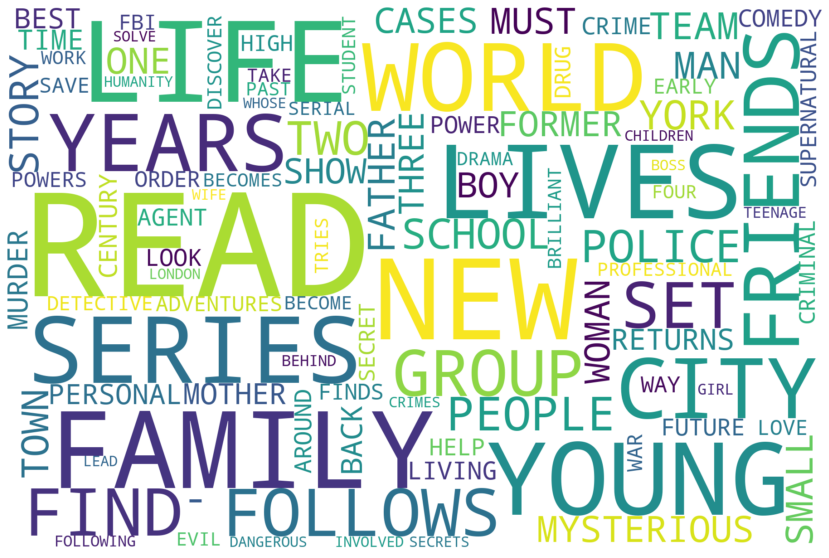

In [35]:
wordcloud = WordCloud(
    max_font_size=320, max_words=100, background_color='white',
    width=1800, height=1200
).generate_from_frequencies(word_count)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()